Estatísticas Descritivas:
             Area   Perimeter  Compactness  Kernel Length  Kernel Width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry Coefficient  Kernel Groove Length       Class  
count             210.000000            210.000000  210.000000  
mean                3.700201              5.408071    2.000000  
std                 1.503557              0.491480    0.818448  
min                 0.765100          

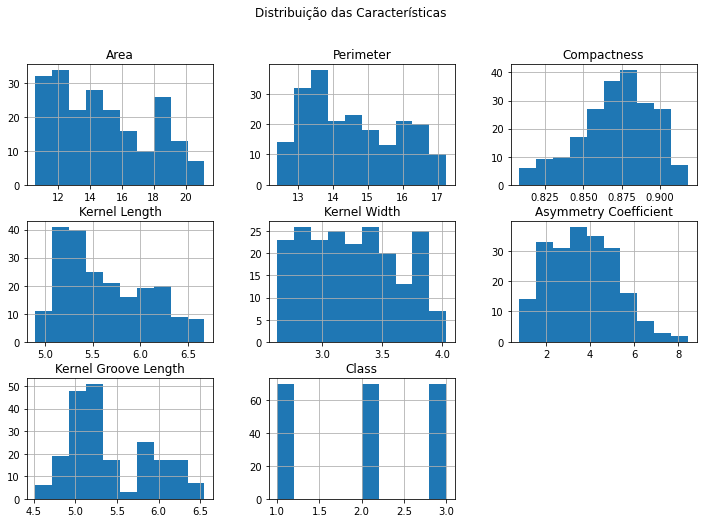


Gerando boxplots...


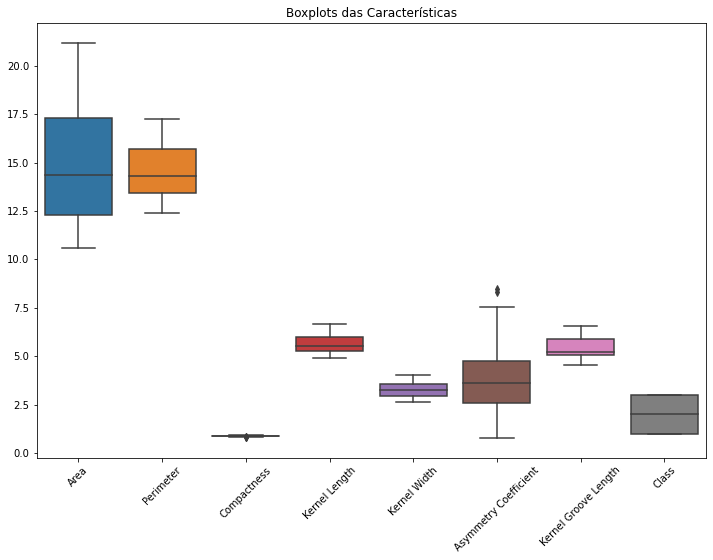


Gerando gráficos de dispersão...


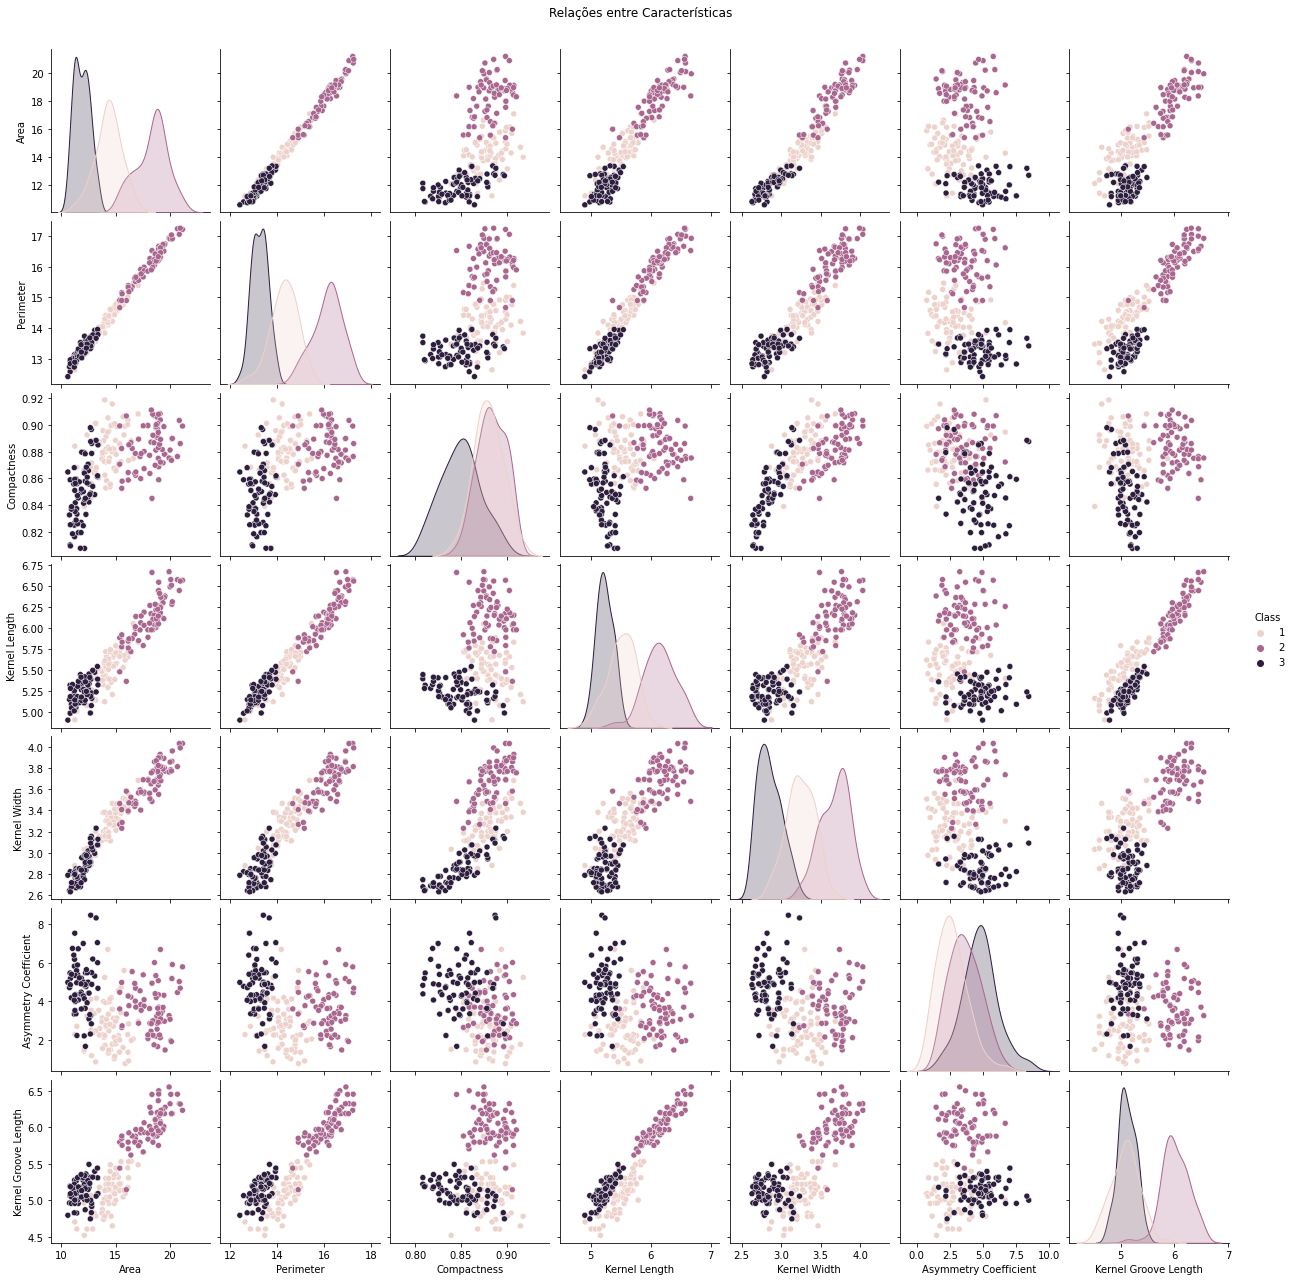


Valores ausentes por coluna:
Area                     0
Perimeter                0
Compactness              0
Kernel Length            0
Kernel Width             0
Asymmetry Coefficient    0
Kernel Groove Length     0
Class                    0
dtype: int64

Dados padronizados:
        Area  Perimeter  Compactness  Kernel Length  Kernel Width  \
0  0.142098   0.215462     0.000061       0.304218      0.141702   
1  0.011188   0.008224     0.428515      -0.168625      0.197432   
2 -0.192067  -0.360201     1.442383      -0.763637      0.208048   
3 -0.347091  -0.475333     1.039381      -0.688978      0.319508   
4  0.445257   0.330595     1.374509       0.066666      0.805159   

   Asymmetry Coefficient  Kernel Groove Length  Class  
0              -0.986152             -0.383577      1  
1              -1.788166             -0.922013      1  
2              -0.667479             -1.189192      1  
3              -0.960818             -1.229983      1  
4              -1.563495      

In [3]:
#1. Analisar e pré-processar os dados fornecidos. 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\Amanda\OneDrive\Área de Trabalho\FASE4_CAP3\CAP3\seeds_dataset.txt'


data = pd.read_csv(file_path, sep=r'\s+', header=None)

data.columns = [
    "Area",
    "Perimeter",
    "Compactness",
    "Kernel Length",
    "Kernel Width",
    "Asymmetry Coefficient",
    "Kernel Groove Length",
    "Class"
]

print("Estatísticas Descritivas:")
print(data.describe())

print("\nGerando histogramas...")
data.hist(bins=10, figsize=(12, 8))
plt.suptitle("Distribuição das Características")
plt.show()

print("\nGerando boxplots...")
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplots das Características")
plt.xticks(rotation=45)
plt.show()

print("\nGerando gráficos de dispersão...")
sns.pairplot(data, hue="Class", diag_kind="kde")
plt.suptitle("Relações entre Características", y=1.02)
plt.show()

print("\nValores ausentes por coluna:")
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[:-1])
scaled_df['Class'] = data['Class']
print("\nDados padronizados:\n", scaled_df.head())

scaled_df.to_csv(r'C:\Users\Amanda\OneDrive\Área de Trabalho\FASE4_CAP3\CAP3\seeds_dataset.csv', index=False)
print("\nDados padronizados salvos em: seeds_scaled.csv")



In [4]:
#2. Implementar e comparar diferentes algoritmos de classificação: 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

scaled_df = pd.read_csv(r'C:\Users\Amanda\OneDrive\Área de Trabalho\FASE4_CAP3\CAP3\seeds_dataset.csv')

X = scaled_df.drop("Class", axis=1)
y = scaled_df["Class"]

# Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_knn = KNeighborsClassifier() 
model_svm = SVC()
model_rf = RandomForestClassifier()
model_lr = LogisticRegression()

model_knn.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

# Previsões
y_pred_knn = model_knn.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_lr = model_lr.predict(X_test)


# Métricas
def avaliar_modelo(y_true, y_pred, nome_modelo):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    matrix = confusion_matrix(y_true, y_pred)

    print(f"Métricas para {nome_modelo}:")
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Matriz de Confusão:")
    print(matrix)
    print("-" * 30)


# Avaliar KNN
avaliar_modelo(y_test, y_pred_knn, "KNN")

# Avaliar SVM
avaliar_modelo(y_test, y_pred_svm, "SVM")

# Avaliar Random Forest
avaliar_modelo(y_test, y_pred_rf, "Random Forest")

# Avaliar Regressão Logística
avaliar_modelo(y_test, y_pred_lr, "Regressão Logística")

Métricas para KNN:
Acurácia: 0.90
Precisão: 0.91
Recall: 0.90
F1-Score: 0.91
Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]
------------------------------
Métricas para SVM:
Acurácia: 0.92
Precisão: 0.92
Recall: 0.92
F1-Score: 0.92
Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 2  0 20]]
------------------------------
Métricas para Random Forest:
Acurácia: 0.87
Precisão: 0.88
Recall: 0.87
F1-Score: 0.87
Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 4  0 18]]
------------------------------
Métricas para Regressão Logística:
Acurácia: 0.90
Precisão: 0.91
Recall: 0.90
F1-Score: 0.91
Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]
------------------------------


In [14]:
#3. Otimizar os modelos para melhorar o desempenho:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


scaled_df = pd.read_csv(r'C:\Users\Amanda\OneDrive\Área de Trabalho\FASE4_CAP3\CAP3\seeds_dataset.csv')

# Separar as features do target
X = scaled_df.drop("Class", axis=1)
y = scaled_df["Class"]

# Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_knn = {'n_neighbors': [1,3], 'weights': ['uniform', 'distance']}
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
param_grid_rf = {'n_estimators': [5, 6], 'max_depth': [None, 10, 20]}
param_grid_lr = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [200, 500]}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)


# Métricas
def avaliar_modelo(y_true, y_pred, nome_modelo):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    matrix = confusion_matrix(y_true, y_pred)

    print(f"Métricas para {nome_modelo}:")
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Matriz de Confusão:")
    print(matrix)
    print("-" * 30)


# Resultados
def avaliar_grid_search(grid_search, nome_modelo):
    print(f"Melhores hiperparâmetros para {nome_modelo}: {grid_search.best_params_}")
    y_pred = grid_search.predict(X_test)
    avaliar_modelo(y_test, y_pred, nome_modelo)


avaliar_grid_search(grid_search_knn, "KNN")
avaliar_grid_search(grid_search_svm, "SVM")
avaliar_grid_search(grid_search_rf, "Random Forest")
avaliar_grid_search(grid_search_lr, "Regressão Logística")

Melhores hiperparâmetros para KNN: {'n_neighbors': 1, 'weights': 'uniform'}
Métricas para KNN:
Acurácia: 0.89
Precisão: 0.89
Recall: 0.89
F1-Score: 0.89
Matriz de Confusão:
[[17  0  3]
 [ 2 19  0]
 [ 2  0 20]]
------------------------------
Melhores hiperparâmetros para SVM: {'C': 1, 'kernel': 'linear'}
Métricas para SVM:
Acurácia: 0.90
Precisão: 0.91
Recall: 0.90
F1-Score: 0.91
Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]
------------------------------
Melhores hiperparâmetros para Random Forest: {'max_depth': None, 'n_estimators': 6}
Métricas para Random Forest:
Acurácia: 0.87
Precisão: 0.90
Recall: 0.87
F1-Score: 0.88
Matriz de Confusão:
[[19  0  1]
 [ 2 19  0]
 [ 5  0 17]]
------------------------------
Melhores hiperparâmetros para Regressão Logística: {'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}
Métricas para Regressão Logística:
Acurácia: 0.92
Precisão: 0.92
Recall: 0.92
F1-Score: 0.92
Matriz de Confusão:
[[17  0  3]
 [ 0 21  0]
 [ 2  0 20]]
------------------------

Análise dos Resultados
Modelo: KNN
Melhores Hiperparâmetros: {'n_neighbors': 1, 'weights': 'uniform'}
Acurácia: 0.89 - Este modelo classifica corretamente 89.00% das amostras.
Precisão: 0.89 - As classificações positivas são corretas em 89.00% dos casos.
Recall: 0.89 - O modelo identifica corretamente 89.00% das amostras de cada classe.
F1-Score: 0.89 - Equilíbrio entre precisão e recall.
Matriz de Confusão:
[17, 0, 3]
[2, 19, 0]
[2, 0, 20]
🟡 Este modelo é aceitável, mas pode não ser ideal para a automação total.
----------------------------------------
Modelo: SVM
Melhores Hiperparâmetros: {'C': 1, 'kernel': 'linear'}
Acurácia: 0.90 - Este modelo classifica corretamente 90.00% das amostras.
Precisão: 0.91 - As classificações positivas são corretas em 91.00% dos casos.
Recall: 0.90 - O modelo identifica corretamente 90.00% das amostras de cada classe.
F1-Score: 0.91 - Equilíbrio entre precisão e recall.
Matriz de Confusão:
[17, 0, 3]
[1, 20, 0]
[2, 0, 20]
🟢 Este modelo é altamente efic

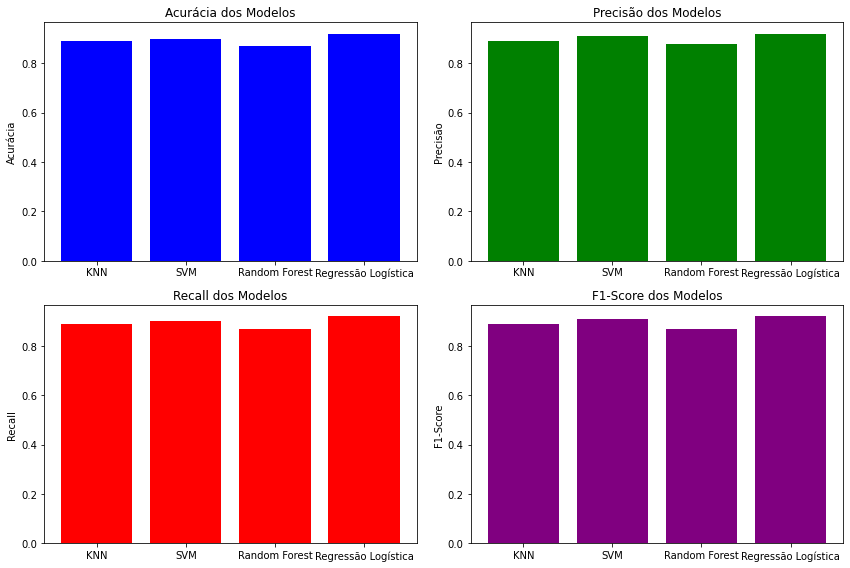

In [15]:
#4. Interpretar os resultados e extrair insights relevantes: 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Resultados obtidos
resultados = {
    "KNN": {
        "Melhores Hiperparâmetros": {'n_neighbors': 1, 'weights': 'uniform'},
        "Métricas": {
            "Acurácia": 0.89,
            "Precisão": 0.89,
            "Recall": 0.89,
            "F1-Score": 0.89,
            "Matriz de Confusão": [[17, 0, 3], [2, 19, 0], [2, 0, 20]],
        },
    },
    "SVM": {
        "Melhores Hiperparâmetros": {'C': 1, 'kernel': 'linear'},
        "Métricas": {
            "Acurácia": 0.90,
            "Precisão": 0.91,
            "Recall": 0.90,
            "F1-Score": 0.91,
            "Matriz de Confusão": [[17, 0, 3], [1, 20, 0], [2, 0, 20]],
        },
    },
    "Random Forest": {
        "Melhores Hiperparâmetros": {'max_depth': 20, 'n_estimators': 5},
        "Métricas": {
            "Acurácia": 0.87,
            "Precisão": 0.88,
            "Recall": 0.87,
            "F1-Score": 0.87,
            "Matriz de Confusão": [[17, 0, 3], [1, 20, 0], [4, 0, 18]],
        },
    },
    "Regressão Logística": {
        "Melhores Hiperparâmetros": {'C': 10, 'solver': 'lbfgs'},
        "Métricas": {
            "Acurácia": 0.92,
            "Precisão": 0.92,
            "Recall": 0.92,
            "F1-Score": 0.92,
            "Matriz de Confusão": [[17, 0, 3], [0, 21, 0], [2, 0, 20]],
        },
    },
}

# Insights
def extrair_insights(resultados):
    print("Análise dos Resultados")
    print("=" * 40)


    modelos = []
    acuracias = []
    precisaoes = []
    recalls = []
    f1_scores = []

    for modelo, detalhes in resultados.items():
        print(f"Modelo: {modelo}")
        print(f"Melhores Hiperparâmetros: {detalhes['Melhores Hiperparâmetros']}")

        # Métricas
        acuracia = detalhes['Métricas']['Acurácia']
        precisao = detalhes['Métricas']['Precisão']
        recall = detalhes['Métricas']['Recall']
        f1_score = detalhes['Métricas']['F1-Score']
        matriz_confusao = detalhes['Métricas']['Matriz de Confusão']

        
        modelos.append(modelo)
        acuracias.append(acuracia)
        precisaoes.append(precisao)
        recalls.append(recall)
        f1_scores.append(f1_score)

        # Interpretação
        print(f"Acurácia: {acuracia:.2f} - Este modelo classifica corretamente {acuracia * 100:.2f}% das amostras.")
        print(f"Precisão: {precisao:.2f} - As classificações positivas são corretas em {precisao * 100:.2f}% dos casos.")
        print(f"Recall: {recall:.2f} - O modelo identifica corretamente {recall * 100:.2f}% das amostras de cada classe.")
        print(f"F1-Score: {f1_score:.2f} - Equilíbrio entre precisão e recall.")

        # Matriz de Confusão
        print("Matriz de Confusão:")
        for linha in matriz_confusao:
            print(linha)

        
        if acuracia >= 0.90:
            print("🟢 Este modelo é altamente eficaz para o problema de classificação de grãos.")
        elif 0.85 <= acuracia < 0.90:
            print("🟡 Este modelo é aceitável, mas pode não ser ideal para a automação total.")
        else:
            print("🔴 Este modelo apresenta desempenho insuficiente para uso prático.")

        print("-" * 40)

    # Gráficos de barras para as métricas
    x = range(len(modelos))

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.bar(x, acuracias, color='blue')
    plt.xticks(x, modelos)
    plt.ylabel('Acurácia')
    plt.title('Acurácia dos Modelos')

    plt.subplot(2, 2, 2)
    plt.bar(x, precisaoes, color='green')
    plt.xticks(x, modelos)
    plt.ylabel('Precisão')
    plt.title('Precisão dos Modelos')

    plt.subplot(2, 2, 3)
    plt.bar(x, recalls, color='red')
    plt.xticks(x, modelos)
    plt.ylabel('Recall')
    plt.title('Recall dos Modelos')

    plt.subplot(2, 2, 4)
    plt.bar(x, f1_scores, color='purple')
    plt.xticks(x, modelos)
    plt.ylabel('F1-Score')
    plt.title('F1-Score dos Modelos')

    plt.tight_layout()
    plt.show()


extrair_insights(resultados)